In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import math

def f(x,t):
    val =  math.exp(-3*t)*math.sin(math.pi*x)*(-3 + (math.pi**2*(1 + x**4)))
    return val

def a(x):
    return 1 + x**4

def initial_u(x):
    ret = np.zeros((len(x)))
    for i in range(len(x)):
        ret[i] = math.sin(math.pi*x[i])
    return ret

def u_anal(x,t):
    sol = np.zeros((len(t),len(x)))
    for j in range(len(t)):
        for i in range(len(x)):
            sol[j][i] = math.exp(-3*t[j])*math.sin(math.pi*x[i])
    return sol

In [76]:
h = 1/20
nx = 20
#tau = 1/1600 #тогда схема удовлетвряет условию Куранта и устойчива
#nt = 1600
tau = 1/50
nt = 50
X = np.linspace(0,1,nx+1)
T = np.linspace(0,1,nt+1)
A = np.zeros((len(X)))
F = np.zeros((len(T),len(X)))
for i in range(len(T)):
    for j in range(len(X)):
        A[j] = a(X[j])
        F[i][j] = f(X[j],T[i])

In [77]:
#реализуем явную схему, ищем u^{n+1}_m
def u_ES(x, t):
    if t == 0: #начальные условия
        return initial_u(x)
    uvals = [] #значение "u" для данного шага по времени
    for j in range(len(x)):
        if j == 0: # левая граница
            uvals.append(0)
        elif j == len(x)-1: # правая граница
            uvals.append(0)
        else:
            uvals.append(U[t-1][j] + tau*A[j]/h**2*(U[t-1][j-1]-2*U[t-1][j] + U[t-1][j + 1])+ F[t-1][j]*tau)
    return uvals

U = []
for i in range(len(T)):
    U.append(u_ES(X, i))

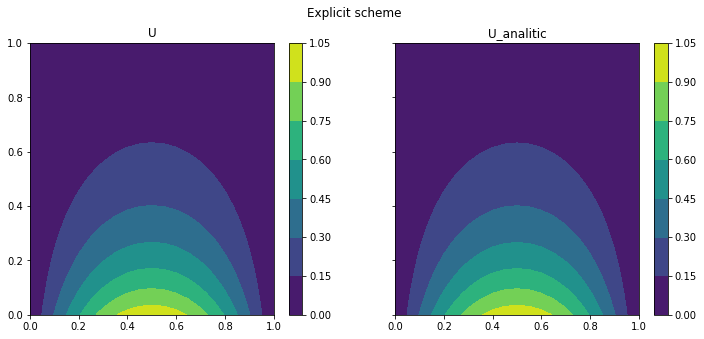

In [78]:
U_a = u_anal(X,T)
fu, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
c1 = ax1.contourf(X, T, U, cmap="viridis")
plt.colorbar(c1, ax = ax1)
ax1.set_title('U')
c2 = ax2.contourf(X, T, U_a, cmap="viridis")
plt.colorbar(c2, ax = ax2)
ax2.set_title('U_analitic')

fu.set_size_inches(12, 5)
fu.suptitle('Explicit scheme')
plt.savefig("solution2_Kurant.png")
plt.show()

In [72]:
#реализуем схему Кранка_Николсона
def TMA(a,b,c,r):#прогонка

    alpha = [b[0]/c[0]]
    beta = [r[0]/c[0]]
    n = len(r)
    p = [0]*n

    for i in range(1,n-1):
        alpha.append(-b[i]/(a[i - 1]*alpha[i-1] - c[i]))
        beta.append(-(r[i] - a[i - 1]*beta[i - 1])/(a[i -1]*alpha[i-1] - c[i]))
    
    beta.append((r[n-1] - beta[n- 2] * a[n-2])/(c[n-2] - alpha[n-2] * a[n-2]))
    p[n-1] = beta[n - 1]
    for i in reversed(range(n-1)):
        p[i] = beta[i] - alpha[i]*p[i+1]
    return p

def u_KN(x,t):
    if t == 0: #начальные условия
        return initial_u(x)
    uvals = [] #значение "u" для данного шага по времени
    r = []
    a = []
    c = []
    b = []
    for j in range(1,len(x) - 1):
        if j == 1: # левая граница
            r.append(F[t-1][j]*tau*h**2 + (h**2 + A[j]*tau)*U_kn[t-1][j] + A[j]*tau*U_kn[t-1][j+1]/2 
                     + A[j]/2*tau*U_kn[t-1][j - 1] )
            c.append(A[j]*tau + h**2)
            b.append(-A[j]*tau/2)
        elif j == len(x)-2: # правая граница
            r.append(F[t-1][j]*tau*h**2 + (h**2 + A[j]*tau)*U_kn[t-1][j] + A[j]/2*tau*U_kn[t-1][j - 1] 
                     + A[j]/2*tau*U_kn[t-1][j + 1])
            c.append(A[j]*tau + h**2)
            a.append(-A[j]*tau/2)
        else:
            r.append(F[t-1][j]*tau*h**2 + (h**2 + A[j]*tau)*U_kn[t-1][j] + A[j]/2*tau*U_kn[t-1][j - 1] 
                     + A[j]/2*tau*U_kn[t-1][j + 1])
            c.append(A[j]*tau + h**2)
            a.append(-A[j]*tau/2)
            b.append(-A[j]*tau/2)
    uvals.append(0)
    uv = TMA(a,b,c,r)#делаем прогонку
    for el in uv:
        uvals.append(el)
    uvals.append(0)
    return uvals

U_kn = np.zeros((len(T),len(X)))
for i in range(len(T)):
    U_kn[i] = u_KN(X,i)

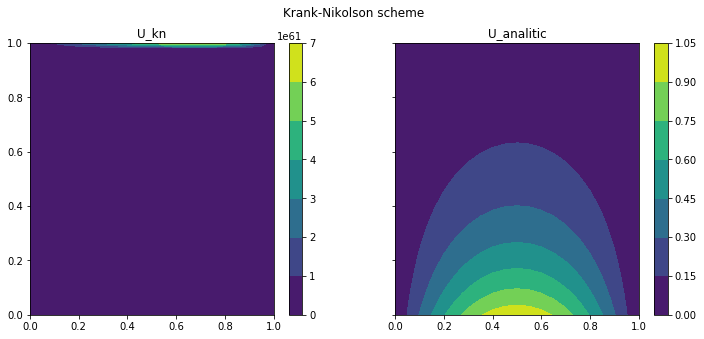

In [73]:
T1=np.zeros((5))
for i in range(5):
    T1[i] = T[i]
U_a = u_anal(X,T)
fu, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
c1 = ax1.contourf(X, T, U_kn, cmap="viridis")
plt.colorbar(c1, ax = ax1)
ax1.set_title('U_kn')
c2 = ax2.contourf(X, T, U_a, cmap="viridis")
plt.colorbar(c2, ax = ax2)
ax2.set_title('U_analitic')

fu.set_size_inches(12, 5)
fu.suptitle('Krank-Nikolson scheme')
plt.savefig("solutionKN.png")
plt.show()

In [75]:
file = open('sol.txt', 'w')
file.write('U_a:'+'\n')
for i in range(len(T)):
    file.write(str(U_a.T[11][i])+'\n')
U = np.array(U)
file.write('U:'+'\n')
for i in range(len(T)):
    file.write(str(U.T[11][i])+'\n')
U_kn = np.array(U_kn)
file.write('U_kn:'+'\n')
for i in range(len(T)):
    file.write(str(U_kn.T[11][i])+'\n')
file.close()